<img src="seminarlogo.png" class="center" style="width:100%;"> </img>

# <span style="color:navy"> **Seminar Project:** </span> <span style="color:green"> **MRSP**</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style = "color: navy"> **General Procedure:** </span>
1. The seminar project is group (team) based assignment with each group consists of Five (05) members
2. Each group is assigned same Seminar project, hence, it is a sort of competition among the groups and the grades are based on the best performance of the group. The points for the project assignment will be distribute among the group member on different weights depends on the indivisual performance.
3. There is one group coordinator, who is reponsible for the coordination among the members and responsible for report and results along with establishing the repository (such as GIT)
4. The duration of the seminar project is from **01.06.2024** to **31.07.2024**, with a mid-term meeting with each group from **01.07.2024** to **06.07.2024** (*Book an appointment at your convience*)
5. There will be a report at the end of project. The submission date for the report is **31.07.2024**
6. The report and results presentation will held from **01.08.2024** to **15.08.2024** (The specific date for each group will be selected after mutual consensus)

<span style="color:blue"> Note: Further Instructions and procedures may be updated from time to time</span>
    
</div>

### <span style = "color: navy"> **Introduction:** </span>
The main aim of the seminar project is to find out the perceptual similarities between different audio stimuli by calculating an objective measure **Perceptual Loss Function** and a subjective measure using **MUSHRA** listening experiment  
The project is divided into five major tasks and for each part there is one student responsible for it. The Tasks are:
#### <span style = "color: navy"> 1. Preparing audio data </span>
- Prepare five dry audio files with $24$ bit rate and sample rate of either $44100$ Hz or $48000$ Hz. These audios should have distinct spectral charecteristics from each other, which means select the five differnt audio file such as (e.g.), i) Drum ii) Speach iii) Piano Music iv) Mix Instrumental Music v) Trumpet. (These are just examples, you are free to choose the audio file). But Important point is these audios should be dry (without any sound effects, such as reverberation etc.)
- From these five audios generate three versions of each with i) Small Office Environment ii) Opera Hall iii) Reverb hall with reverberation time at least 1.5 sec.
- In this way you have $20$ audio files in total and $5$ groups and each group contains $4$ version of single audio
#### <span style = "color: navy"> 2. **Perceptual Loss** Objective Measure (five groups) </span>
- You need to use the GIT repository for this purpose, which is available at (https://github.com/TUIlmenauAMS/PsychoacousticLoss)
#### <span style = "color: navy"> 3. MUSHRA: Subjective measures: </span>
- Prepare the software for the listening experiment using **MUSHRA** test. The GIT repositor is available at (https://github.com/audiolabs/webMUSHRA)
#### <span style = "color: navy"> 4. Listening experiment management </span>
- Conduct a listening experiment with the DSM Course students which will be availbe during first and second week of the July. You have to coordinate with the students.
- Make a coordination with the listening experiment room responsible people (This will be done including us)
#### <span style = "color: navy"> 5. Report and Coordination </span>
- The group coordinator will be responsible for the coordination and final report submission
- The group coordinator will communicate with the Listening Experiment Facility Management
- Other corodination

#### <span style="color:blue"> Further details will be discussed with the group coordinators and the they are responsible for group coordination</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 01:** Preparing audio data </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [1]:
MatriculationNumber = '65821';

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>
Prepare five dry audios with 24-bit rate and sample rate of either 44100 Hz or 48000
 Hz. These audios should have distinct spectral characteristics which means select five
 different audio types such as:
 – Drum
 – Speech
 – Piano Music
 – Mix Instrumental Music
 – Trumpet
 (These are just examples, feel free to choose)
 
From these five audios, generate three versions of each with:
– Small Office Environment
– Opera Hall
– Rever bhall with reverberation time at least 1.5 sec

In this way you have 20 audio files with 5 groups (each group containing 4 versions of
 audio)

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 02:** Perceptual Loss: Objective Measures </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [2]:
MatriculationNumber = '66451'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

 You need to use the GIT repository for this purpose, which is available at: (https://
 github.com/TUIlmenauAMS/PsychoacousticLoss)

In [3]:
!pip install torch torchvision torchaudio
!pip install ffmpeg
!pip install pydub
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import torch
import numpy as np
from scipy.io import wavfile
import scipy.io.wavfile as wav
import ffmpeg
import io
from pydub import AudioSegment
import librosa.display

In [5]:
def read_audio(file_path):
    fs, snd = wav.read(file_path)
    return fs, snd


def convert_to_aac_in_memory(snd, fs=44100, channels=1):

    audio_bytes = snd.tobytes()
    input_params = {
        'format': 's16le',
        'acodec': 'pcm_s16le',
        'ar': fs,
        'ac': channels
    }
    output_params = {
        'format': 'adts',
        'acodec': 'aac'
    }
    out, _ = (
        ffmpeg
        .input('pipe:', **input_params)
        .output('pipe:', **output_params)
        .run(input=audio_bytes, capture_stdout=True, capture_stderr=True)
    )
    aac_io = io.BytesIO(out)
    aac_io.seek(0)
    
    return aac_io

def decode_aac_from_memory(aac_io, snd):
    audio = AudioSegment.from_file(aac_io, format="aac")
    decoded_snd = np.array(audio.get_array_of_samples(), dtype=np.int16)
    if len(decoded_snd) > len(snd):
        decoded_snd = decoded_snd[:len(snd)]
    else:
        decoded_snd = np.pad(decoded_snd, (0, len(snd) - len(decoded_snd)), 'constant')
    return decoded_snd


def simulate_aac(signal, preservation_factor=0.9):
    noise = np.random.normal(0, 0.01, len(signal))
    return signal * preservation_factor + noise

def quantize(signal, levels):
    return np.round(signal * (levels-1)) / (levels-1)


In [6]:
def f_SP_dB_torch(maxfreq, nfilts):

    maxbark = hz2bark_torch(maxfreq)
    # Number of our Bark scale bands over this range: nfilts=64
    spreadingfunctionBarkdB = torch.zeros(2*nfilts)
    # Spreading function prototype, "nfilts" bands for lower slope
    spreadingfunctionBarkdB[0:nfilts] = torch.linspace(
        -maxbark*27, -8, nfilts)-23.5
    # "nfilts" bands for upper slope:
    spreadingfunctionBarkdB[nfilts:2 *
                            nfilts] = torch.linspace(0, -maxbark*12.0, nfilts)-23.5
    return spreadingfunctionBarkdB


def spreadingfunctionmat_torch(spreadingfunctionBarkdB, alpha, nfilts):

    spreadingfunctionBarkVoltage = 10.0**(
        spreadingfunctionBarkdB/20.0*alpha)
    # Spreading functions for all bark scale bands in a matrix:
    spreadingfuncmatrix = torch.zeros((nfilts, nfilts))
    for k in range(nfilts):
        spreadingfuncmatrix[k, :] = spreadingfunctionBarkVoltage[(
            nfilts-k):(2*nfilts-k)]
    return spreadingfuncmatrix


def maskingThresholdBark_torch(mXbark, spreadingfuncmatrix, alpha, fs, nfilts):

    # Compute the non-linear superposition:
    mTbark = torch.matmul(mXbark**alpha, spreadingfuncmatrix**alpha)
    # apply the inverse exponent to the result:
    mTbark = mTbark**(1.0/alpha)
    # Threshold in quiet:
    maxfreq = fs/2.0
    maxbark = hz2bark_torch(maxfreq)
    step_bark = maxbark/(nfilts-1)
    barks = torch.arange(0, nfilts)*step_bark
    # convert the bark subband frequencies to Hz:
    f = bark2hz_torch(barks)+1e-6
    # Threshold of quiet in the Bark subbands in dB:
    LTQ = torch.clip((3.64*(f/1000.)**-0.8 - 6.5*torch.exp(-0.6*(f/1000.-3.3)**2.)
                      + 1e-3*((f/1000.)**4.)), -20, 120)
    # Maximum of spreading functions and hearing threshold in quiet:
    a = mTbark
    b = 10.0**((LTQ-60)/20)
    mTbark = torch.max(a, b)
    return mTbark


def hz2bark_torch(f):
    """ Usage: Bark=hz2bark(f)
          f    : (ndarray)    Array containing frequencies in Hz.
      Returns  :
          Brk  : (ndarray)    Array containing Bark scaled values.
      """
    if not torch.is_tensor(f):
        f = torch.tensor(f)

    Brk = 6. * torch.arcsinh(f/600.)
    return Brk


def bark2hz_torch(Brk):
    """ Usage:
      Hz=bark2hs(Brk)
      Args     :
          Brk  : (ndarray)    Array containing Bark scaled values.
      Returns  :
          Fhz  : (ndarray)    Array containing frequencies in Hz.
      """
    if not torch.is_tensor(Brk):
        Brk = torch.tensor(Brk)
    Fhz = 600. * torch.sinh(Brk/6.)
    return Fhz


def mapping2barkmat_torch(fs, nfilts, nfft):

    maxbark = hz2bark_torch(fs/2)
    nfreqs = nfft/2
    step_bark = maxbark/(nfilts-1)
    binbark = hz2bark_torch(
        torch.linspace(0, (nfft/2), (nfft//2)+1)*fs/nfft)
    W = torch.zeros((nfilts, nfft))
    for i in range(nfilts):
        W[i, 0:int(nfft/2)+1] = (torch.round(binbark/step_bark) == i)
    return W


def mapping2bark_torch(mX, W, nfft):

    nfreqs = int(nfft/2)
    # Here is the actual mapping, suming up powers and conv. back to Voltages:
    mXbark = (torch.matmul(
        torch.abs(mX[:nfreqs])**2.0, W[:, :nfreqs].T))**(0.5)
    return mXbark


def mappingfrombarkmat_torch(W, nfft):

    nfreqs = int(nfft/2)
    W_inv = torch.matmul(torch.diag(
        (1.0/(torch.sum(W, 1)+1e-6))**0.5), W[:, 0:nfreqs + 1]).T
    return W_inv

# -------------------


def mappingfrombark_torch(mTbark, W_inv, nfft):

    nfreqs = int(nfft/2)
    mT = torch.matmul(mTbark, W_inv[:, :nfreqs].T.float())
    return mT

def psyacthresh_torch(ys, fs):
    # input: ys: 2d array of sound STFT (from a mono signal, shape N+1,M)
    # fs: sampling frequency in samples per second
    # returns: mT, the masking threshold in N+1 subbands for the M blocks (shape N+1,M)

    maxfreq = fs/2
    alpha = 0.8  # Exponent for non-linear superposition of spreading functions
    nfilts = 64  # number of subbands in the bark domain
    # M=len(snd)//nfft
    M = ys.shape[1]
    # N=nfft//2
    N = ys.shape[0]-1
    nfft = 2*N

    W = mapping2barkmat_torch(fs, nfilts, nfft)
    W_inv = mappingfrombarkmat_torch(W, nfft)
    spreadingfunctionBarkdB = f_SP_dB_torch(maxfreq, nfilts)
    # maxbark=hz2bark(maxfreq)
    # bark=np.linspace(0,maxbark,nfilts)
    spreadingfuncmatrix = spreadingfunctionmat_torch(
        spreadingfunctionBarkdB, alpha, nfilts)
    # Computing the masking threshold in each block of nfft samples:
    mT = torch.zeros((N+1, M))
    for m in range(M):  # M: number of blocks
        # mX=np.abs(np.fft.fft(snd[m*nfft+np.arange(2048)],norm='ortho'))[0:1025]
        mX = torch.abs(ys[:, m])
        mXbark = mapping2bark_torch(mX, W, nfft)
        # Compute the masking threshold in the Bark domain:
        mTbark = maskingThresholdBark_torch(
            mXbark, spreadingfuncmatrix, alpha, fs, nfilts)
        # Massking threshold in the original frequency domain
        mT[:, m] = mappingfrombark_torch(mTbark, W_inv, nfft)

    return mT  # the masking threshold in N+1 subbands for the M blocks


def percloss(orig, modified, fs):

    nfft = 2048  # number of fft subbands
    N = nfft//2

    # print("orig.shape=", orig.shape)
    
    # origsys.shape= freq.bin, channel, block
    if len(orig.shape) == 2:  # multichannel
        chan = orig.shape[1]
        for c in range(chan):
            origys = torch.stft(orig[:,c], n_fft=2*N, hop_length=2 *
                        N//2, return_complex=True, normalized=True, window=torch.hann_window(2*N))
            if c == 0:  # initialize masking threshold tensor mT
                mT0 = psyacthresh_torch(origys[:, :], fs)
                rows, cols = mT0.shape
                mT = torch.zeros((rows, chan, cols))
                mT[:, 0, :] = mT0
            else:
                mT[:, c, :] = psyacthresh_torch(origys[:, :], fs)
    else:
        chan = 1
        origys = torch.stft(orig, n_fft=2*N, hop_length=2 *
                        N//2, return_complex=True, normalized=True, window=torch.hann_window(2*N))
        mT = psyacthresh_torch(origys, fs)
    """
    plt.plot(20*np.log10(np.abs(origys[:,0,400])+1e-6))
    plt.plot(20*np.log10(mT[:,0,400]+1e-6))
    plt.legend(('Original spectrum','Masking threshold'))
    plt.title("Spectrum over bins")
    """
    # print("origys.shape=",origys.shape, "mT.shape=",mT.shape)

    modifiedys = torch.stft(
        modified, n_fft=2*N, hop_length=2*N//2, return_complex=True, normalized=True, window=torch.hann_window(2*N))

    # normalized diff. spectrum:
    normdiffspec = torch.abs((origys-modifiedys)/mT)
    # Plot difference spectrum, normalized to masking threshold:
    """
    plt.plot(20*np.log10(normdiffspec[:,0,400])+1e-6)
    plt.title("normalized diff. spectrum")
    plt.show()
    """
    ploss = torch.mean(normdiffspec**2)
    return ploss

In [7]:
def plot_audio_comparison(snd, snd_quant, snd_aac, fs):
    plt.figure(figsize=(15, 5))

    snd_float = snd.astype(np.float32) / np.max(np.abs(snd))
    snd_quant_float = snd_quant.astype(np.float32) / np.max(np.abs(snd_quant))
    snd_aac_float = snd_aac.astype(np.float32) / np.max(np.abs(snd_aac))

    plt.subplot(1, 3, 1)
    librosa.display.waveshow(snd_float, sr=fs)
    plt.title('Original Audio')

    plt.subplot(1, 3, 2)
    librosa.display.waveshow(snd_quant_float, sr=fs)
    plt.title('Quantized Audio')

    plt.subplot(1, 3, 3)
    librosa.display.waveshow(snd_aac_float, sr=fs)
    plt.title('AAC Encoded Audio')

    plt.tight_layout()
    plt.show()

def plot_bar(df):
    new_df = df.copy()
    new_df['ploss_Q_norm'] = new_df.apply(lambda row: row['ploss_Q'] / max(row['ploss_Q'], row['ploss_A']), axis=1)
    new_df['ploss_A_norm'] = new_df.apply(lambda row: row['ploss_A'] / max(row['ploss_Q'], row['ploss_A']), axis=1)
    fig, ax = plt.subplots(figsize=(15, 8))
    bar_width = 0.4
    index = np.arange(len(new_df))
    bars1 = ax.bar(index, new_df['ploss_Q_norm'], bar_width, label='Quantized Loss')
    bars2 = ax.bar(index + bar_width, new_df['ploss_A_norm'], bar_width, label='AAC Loss')
    ax.set_xlabel('File Name')
    ax.set_ylabel('Normalized Perceptual Loss')
    ax.set_title('Comparison of Quantized and AAC Loss for Different Audio Files')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(new_df['file_name'], rotation=90)
    ax.legend()
    fig.tight_layout()
    plt.savefig('../results/ploss_AQ.png')
    plt.show()


In [8]:
def get_files(path_for_songs):
    dir_list = os.listdir(path_for_songs)
    files = {}
    for entry in dir_list:
        full_path = os.path.join(path_for_songs, entry)
        if os.path.isdir(full_path):
            files[entry] = os.listdir(full_path)
        else:
            files[entry] = entry

    df = pd.DataFrame([(file, genre) for genre, files in files.items() for file in files], columns=['file_name', 'genre'])
    df.reset_index(drop=True, inplace=True)
    df.index += 1
    return df

def main(path_for_songs):
    df = get_files(path_for_songs)

    # Ensure the results directory exists
    results_dir = '../results'
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    for i in range(1, len(df) + 1):
        file_name = df.loc[i, 'file_name']
        genre = df.loc[i, 'genre']
        print(file_name, genre)
        
        file_path = os.path.join(path_for_songs, genre, file_name)
        
        if not os.path.exists(file_path):
            print(f"File {file_path} does not exist. Skipping...")
            continue
        
        fs, snd = wavfile.read(file_path)
        if len(snd.shape) > 1:
            snd = np.mean(snd, axis=1)
        snd = snd.astype(float) / np.max(np.abs(snd))
        snd_quant = quantize(snd, 4)
        snd_aac = simulate_aac(snd)

        quantized_path = os.path.join(results_dir, 'quantized_' + file_name)
        aac_path = os.path.join(results_dir, 'aac_' + file_name)
        
        wav.write(quantized_path, fs, (snd_quant * 32767).astype(np.int16))
        wav.write(aac_path, fs, (snd_aac * 32767).astype(np.int16))

        if len(snd.shape) == 2 or len(snd_quant.shape) == 2 or len(snd_aac.shape) == 2:
            snd = snd[:, 0]
            snd_quant = snd_quant[:, 0]
        else:
            snd = snd
            snd_quant = snd_quant
            
        ploss_quant = percloss(torch.from_numpy(snd).float(), torch.from_numpy(snd_quant).float(), fs)
        ploss_aac = percloss(torch.from_numpy(snd).float(), torch.from_numpy(snd_aac).float(), fs)
        
        print(ploss_quant, ploss_aac, ploss_aac / ploss_quant)
        
        df.loc[i, 'ploss_Q'] = ploss_quant.item()
        df.loc[i, 'ploss_A'] = ploss_aac.item()
    
    df['ploss_A/Q'] = df['ploss_A'] / df['ploss_Q']
    df['winner'] = np.where(df['ploss_A/Q'] < 1, 'AAC', 'Quantization')
    
    results_csv_path = os.path.join(results_dir, 'ploss_AQ.csv')
    df.to_csv(results_csv_path, index=False)
    
    plot_bar(df)

Poetry opera hall 24bit.wav Poetry


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(25.4997) tensor(49.6336) tensor(1.9464)
Poetry dry 24bit.wav Poetry


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(34.6156) tensor(84.4658) tensor(2.4401)
Poetry reverb hall 24bit.wav Poetry


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(68.8022) tensor(41.5463) tensor(0.6039)
Poetry small office 24bit.wav Poetry


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(21.6717) tensor(73.5116) tensor(3.3921)
Ambient dry 24bit.wav Ambient


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(33.5862) tensor(3.3090) tensor(0.0985)
Ambient opera hall 24bit.wav Ambient


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(30.4201) tensor(2.9109) tensor(0.0957)
Ambient small office 24bit.wav Ambient


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(31.2076) tensor(3.0957) tensor(0.0992)
Ambient reverb hall 24bit.wav Ambient


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(32.6767) tensor(3.4739) tensor(0.1063)
Piano reverb hall 24bit.wav Piano


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(4094.5989) tensor(90.4180) tensor(0.0221)
Piano opera hall 24bit.wav Piano


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(4001.0649) tensor(84.4328) tensor(0.0211)
Piano small office 24bit.wav Piano


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(3698.0605) tensor(85.0111) tensor(0.0230)
Piano dry 24bit.wav Piano


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(3642.7236) tensor(83.4382) tensor(0.0229)
Drum beat dry 24bit.wav Drum_Beat


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(101.4378) tensor(10.8383) tensor(0.1068)
Drum beat reverb hall 24bit.wav Drum_Beat


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(23.7547) tensor(1.2100) tensor(0.0509)
Drum beat opera hall 24bit.wav Drum_Beat


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(26.7344) tensor(2.0850) tensor(0.0780)
Drum beat small office room 24bit.wav Drum_Beat


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(20.9495) tensor(4.1464) tensor(0.1979)
Instrumental Small office 24bit.wav Instrumental


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(1153.5046) tensor(53.8845) tensor(0.0467)
Instrumental opera hall 24bit.wav Instrumental


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(993.6500) tensor(48.1562) tensor(0.0485)
Instrumental Dry 24bit.wav Instrumental


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(1282.9030) tensor(54.1975) tensor(0.0422)
Instrumental reverb hall 24bit.wav Instrumental


/tmp/ipykernel_106605/397419621.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(file_path)


tensor(926.7823) tensor(44.5571) tensor(0.0481)


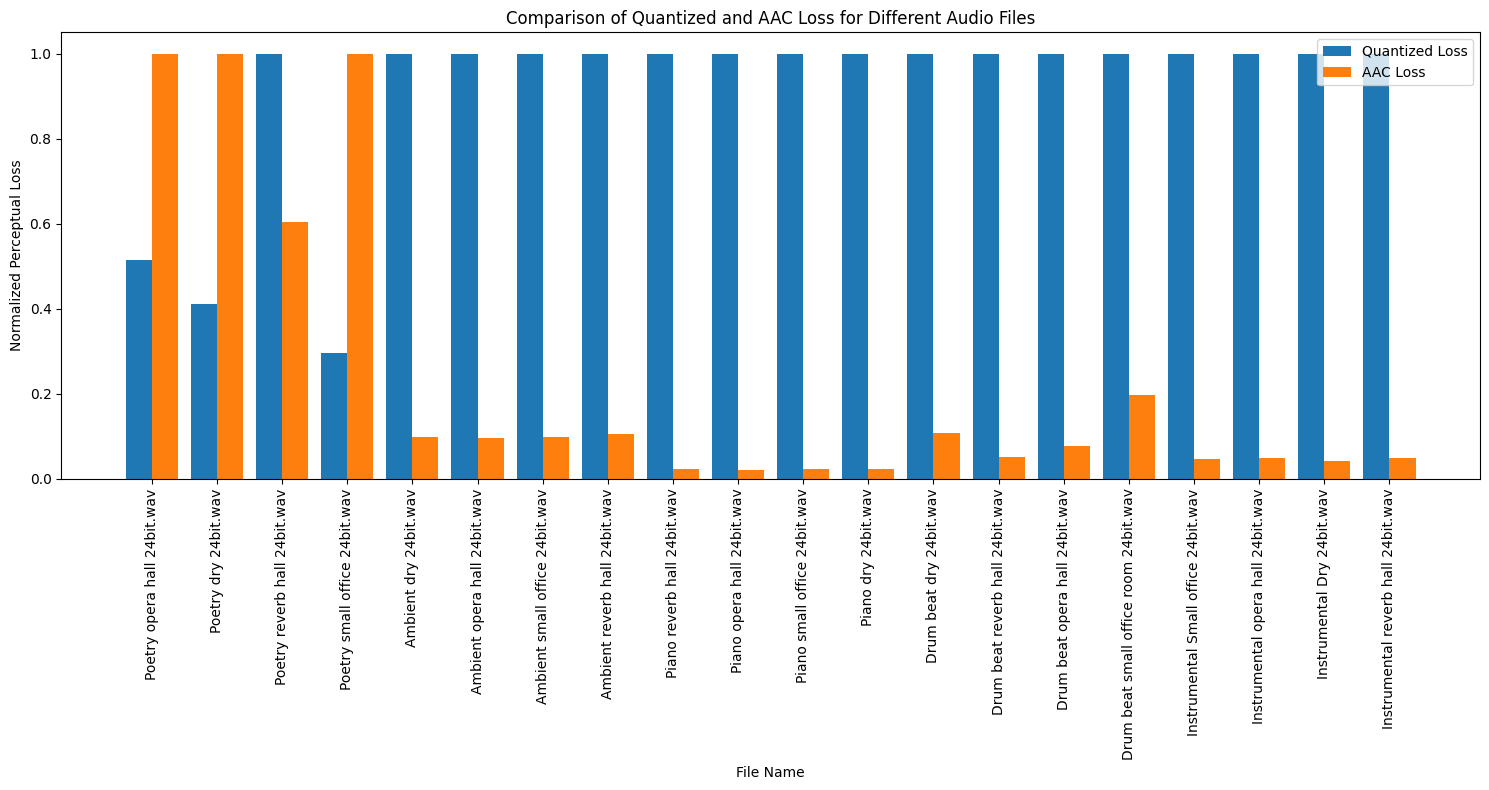

In [15]:
if __name__ == '__main__':
    main('../data/')

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 03:** MUSHRA: Subjective Measures </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [10]:
MatriculationNumber = '66512'

**MUSHRA** (Multiple Stimuli with Hidden Reference and Anchor) is a well-established method for evaluating audio quality, particularly effective for assessing medium to high-quality codecs. According to the ITU recommendation **ITU-R BS.1534**, MUSHRA involves listeners rating various versions of an audio sample, including hidden references, on a scale from 0 to 100. This standardized approach ensures reliable and detailed assessments of audio quality.

The objective of the test was to evaluate and compare the perceived audio quality of different sound types processed through various acoustic environments. The primary focus was on understanding how these environments influence listener perception of sound quality.

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">
    
### <span style="color:navy; font-size: 1.25em"> **TASK 04:** Listening experiment </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [11]:
MatriculationNumber = '66160'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

The perceptual audio quality test was conducted in the University Media Lab using the MUSHRA methodology, with 19 participants involved in the assessment.

**Test Setup:**

**Location:** University Media Lab

**Environment:** Controlled listening environment, isolated from external noise

**Number of Participants:** 19

**Age Group:** 19-38 years

**Selection Criteria:** Participants with normal hearing capabilities

**Equipment:** High-quality circum-aural headphones

During the test, participants listened to a series of audio samples and rated the quality of each sample on a scale. This allowed for a comparative analysis of perceptual loss across different audio processing methods.

In [12]:
import pandas as pd


file_path = '/home/jupyter-64365/MRSP_Seminar_Project/MUSHRA_Results.csv'
data = pd.read_csv(file_path)


data.head(20)

,Subject ID,Ambient_Dry Sound,Ambient_Opera Hall,Ambient_Reverb Hall,Ambient_Small Office,Drum Beat_Dry Sound,Drum Beat_Opera Hall,Drum Beat_Reverb Hall,Drum Beat_Small Office,Instrumental_Dry Sound,...,Instrumental_Reverb Hall,Instrumental_Small Office,Piano_Dry Sound,Piano_Opera Hall,Piano_Reverb Hall,Piano_Small Office,Poetry_Dry Sound,Poetry_Opera Hall,Poetry_Reverb Hall,Poetry_Small Office
0,HiCh0892',95,50,30,75,90,30,10,70,69,...,13,93,90,90,90,90,96,41,29,56
1,PrSh1094',90,35,20,70,90,25,15,40,70,...,40,90,95,90,70,80,95,40,15,55
2,ShWa0497',95,35,50,75,95,40,10,80,85,...,50,75,67,85,80,70,90,25,10,50
3,SuAg0592',40,78,80,70,95,35,15,50,85,...,70,90,70,60,60,65,90,40,15,40
4,SuGh1297',80,55,100,65,100,60,45,80,75,...,70,85,80,90,100,85,100,70,55,85
5,YaMu0596',100,95,90,95,100,85,85,90,100,...,95,100,100,94,92,91,100,89,83,97
6,ZiHe1195',30,45,20,40,60,50,30,70,55,...,35,70,55,30,70,45,90,50,55,70
7,faan0296',89,82,80,97,100,75,82,79,89,...,83,100,98,94,90,96,100,77,76,93
8,imah0198',100,95,94,100,100,86,85,88,99,...,100,100,100,93,98,100,99,78,78,100
9,mufu1197',84,80,77,87,100,68,71,87,93,...,90,96,90,95,92,96,100,77,67,94


In [13]:
data.columns = [
    "Subject ID", "Ambient_Dry", "Ambient_Opera_Hall", "Ambient_Reverb_Hall", "Ambient_Small_Office",
    "Drum_Dry", "Drum_Opera_Hall", "Drum_Reverb_Hall", "Drum_Small_Office",
    "Instrumental_Dry", "Instrumental_Opera_Hall", "Instrumental_Reverb_Hall", "Instrumental_Small_Office",
    "Piano_Dry", "Piano_Opera_Hall", "Piano_Reverb_Hall", "Piano_Small_Office",
    "Poetry_Dry", "Poetry_Opera_Hall", "Poetry_Reverb_Hall", "Poetry_Small_Office"
]



for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

    

stats = data.describe()
stats

,Ambient_Dry,Ambient_Opera_Hall,Ambient_Reverb_Hall,Ambient_Small_Office,Drum_Dry,Drum_Opera_Hall,Drum_Reverb_Hall,Drum_Small_Office,Instrumental_Dry,Instrumental_Opera_Hall,Instrumental_Reverb_Hall,Instrumental_Small_Office,Piano_Dry,Piano_Opera_Hall,Piano_Reverb_Hall,Piano_Small_Office,Poetry_Dry,Poetry_Opera_Hall,Poetry_Reverb_Hall,Poetry_Small_Office
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,87.210526,72.631579,69.684211,79.684211,91.684211,58.789474,51.421053,80.368421,88.105263,77.789474,71.789474,90.631579,86.473684,85.263158,85.368421,85.684211,95.736842,61.947368,54.000000,79.421053
std,20.890133,21.644118,27.554094,24.379073,15.517204,23.866711,30.959321,19.186831,13.054989,24.579980,27.847958,14.606736,20.662280,21.036587,23.779568,18.941585,8.761292,22.648212,27.209067,20.567817
min,30.000000,35.000000,20.000000,5.000000,54.000000,6.000000,0.000000,38.000000,55.000000,20.000000,13.000000,42.000000,20.000000,30.000000,0.000000,35.000000,63.000000,19.000000,9.000000,40.000000
25%,86.500000,52.500000,60.500000,70.000000,92.500000,40.500000,22.500000,74.500000,82.000000,66.000000,60.000000,90.000000,85.000000,90.000000,85.000000,82.500000,95.500000,40.500000,34.000000,56.500000
50%,97.000000,80.000000,78.000000,91.000000,100.000000,65.000000,57.000000,87.000000,91.000000,87.000000,83.000000,96.000000,96.000000,94.000000,93.000000,95.000000,100.000000,74.000000,67.000000,93.000000
75%,100.000000,84.000000,87.000000,97.000000,100.000000,77.000000,78.000000,93.000000,99.000000,97.500000,90.000000,100.000000,99.000000,95.500000,99.000000,97.500000,100.000000,77.000000,74.500000,95.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,93.000000,91.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.000000,93.000000,100.000000


<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **TASK 05:** Report and Coordination </span>
#### <span style="color:blue"> Below Enter Matriculation Number of Responsible Member for this Task </span>

</div>

In [14]:
MatriculationNumber = '64365'

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>

Place to describe the task, procedure, results etc. (delete this line when writting)

In [15]:
def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)][["Subject ID", column]]



outliers = {}
for col in data.columns[1:]:
    outliers[col] = find_outliers(col)


outliers

{'Ambient_Dry':    Subject ID  Ambient_Dry
 3   SuAg0592'           40
 6   ZiHe1195'           30
 10  saja0896'           61,
 'Ambient_Opera_Hall': Empty DataFrame
 Columns: [Subject ID, Ambient_Opera_Hall]
 Index: [],
 'Ambient_Reverb_Hall':    Subject ID  Ambient_Reverb_Hall
 1   PrSh1094'                   20
 6   ZiHe1195'                   20
 10  saja0896'                   20,
 'Ambient_Small_Office':    Subject ID  Ambient_Small_Office
 10  saja0896'                     5,
 'Drum_Dry':    Subject ID  Drum_Dry
 6   ZiHe1195'        60
 10  saja0896'        59
 16  waal0795'        54,
 'Drum_Opera_Hall': Empty DataFrame
 Columns: [Subject ID, Drum_Opera_Hall]
 Index: [],
 'Drum_Reverb_Hall': Empty DataFrame
 Columns: [Subject ID, Drum_Reverb_Hall]
 Index: [],
 'Drum_Small_Office':    Subject ID  Drum_Small_Office
 1   PrSh1094'                 40
 10  saja0896'                 38,
 'Instrumental_Dry':   Subject ID  Instrumental_Dry
 6  ZiHe1195'                55,
 'Instrumen

In [16]:
data = data.drop(6)
data = data.drop(10)
data.head(20)

,Subject ID,Ambient_Dry,Ambient_Opera_Hall,Ambient_Reverb_Hall,Ambient_Small_Office,Drum_Dry,Drum_Opera_Hall,Drum_Reverb_Hall,Drum_Small_Office,Instrumental_Dry,...,Instrumental_Reverb_Hall,Instrumental_Small_Office,Piano_Dry,Piano_Opera_Hall,Piano_Reverb_Hall,Piano_Small_Office,Poetry_Dry,Poetry_Opera_Hall,Poetry_Reverb_Hall,Poetry_Small_Office
0,HiCh0892',95,50,30,75,90,30,10,70,69,...,13,93,90,90,90,90,96,41,29,56
1,PrSh1094',90,35,20,70,90,25,15,40,70,...,40,90,95,90,70,80,95,40,15,55
2,ShWa0497',95,35,50,75,95,40,10,80,85,...,50,75,67,85,80,70,90,25,10,50
3,SuAg0592',40,78,80,70,95,35,15,50,85,...,70,90,70,60,60,65,90,40,15,40
4,SuGh1297',80,55,100,65,100,60,45,80,75,...,70,85,80,90,100,85,100,70,55,85
5,YaMu0596',100,95,90,95,100,85,85,90,100,...,95,100,100,94,92,91,100,89,83,97
7,faan0296',89,82,80,97,100,75,82,79,89,...,83,100,98,94,90,96,100,77,76,93
8,imah0198',100,95,94,100,100,86,85,88,99,...,100,100,100,93,98,100,99,78,78,100
9,mufu1197',84,80,77,87,100,68,71,87,93,...,90,96,90,95,92,96,100,77,67,94
11,sapa0896',100,84,78,92,99,71,74,100,91,...,86,96,96,93,95,91,100,74,67,95


In [17]:
stats = data.describe()
stats

,Ambient_Dry,Ambient_Opera_Hall,Ambient_Reverb_Hall,Ambient_Small_Office,Drum_Dry,Drum_Opera_Hall,Drum_Reverb_Hall,Drum_Small_Office,Instrumental_Dry,Instrumental_Opera_Hall,Instrumental_Reverb_Hall,Instrumental_Small_Office,Piano_Dry,Piano_Opera_Hall,Piano_Reverb_Hall,Piano_Small_Office,Poetry_Dry,Poetry_Opera_Hall,Poetry_Reverb_Hall,Poetry_Small_Office
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,92.117647,76.058824,75.529412,86.411765,95.470588,62.411765,55.705882,83.470588,90.588235,82.176471,77.294118,94.705882,92.235294,91.705882,91.294118,91.058824,98.000000,65.176471,56.588235,81.411765
std,14.760091,20.203560,22.566894,13.172219,11.231193,21.163231,29.408257,16.882379,10.559704,22.031895,23.539235,6.926080,10.341237,8.879504,11.339999,10.437137,3.446012,21.018549,26.441111,20.709475
min,40.000000,35.000000,20.000000,65.000000,54.000000,25.000000,10.000000,40.000000,69.000000,20.000000,13.000000,75.000000,67.000000,60.000000,60.000000,65.000000,90.000000,25.000000,10.000000,40.000000
25%,90.000000,78.000000,75.000000,75.000000,95.000000,41.000000,32.000000,80.000000,85.000000,75.000000,70.000000,92.000000,90.000000,90.000000,90.000000,90.000000,96.000000,41.000000,39.000000,57.000000
50%,98.000000,81.000000,80.000000,92.000000,100.000000,68.000000,71.000000,88.000000,93.000000,92.000000,85.000000,96.000000,97.000000,94.000000,94.000000,96.000000,100.000000,74.000000,67.000000,94.000000
75%,100.000000,84.000000,90.000000,97.000000,100.000000,78.000000,79.000000,94.000000,99.000000,98.000000,90.000000,100.000000,99.000000,96.000000,100.000000,98.000000,100.000000,77.000000,76.000000,96.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,93.000000,91.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.000000,93.000000,100.000000


### <span style="color:blue"> END Report here </span>